Gewichten voor gebruiker 5255745: {'average_altitude_change': 0.051013881380851, 'average_distance': 0.020022582437959003, 'average_condition_value': 0.9289635361811881, 'distance_to_user': 1.0}


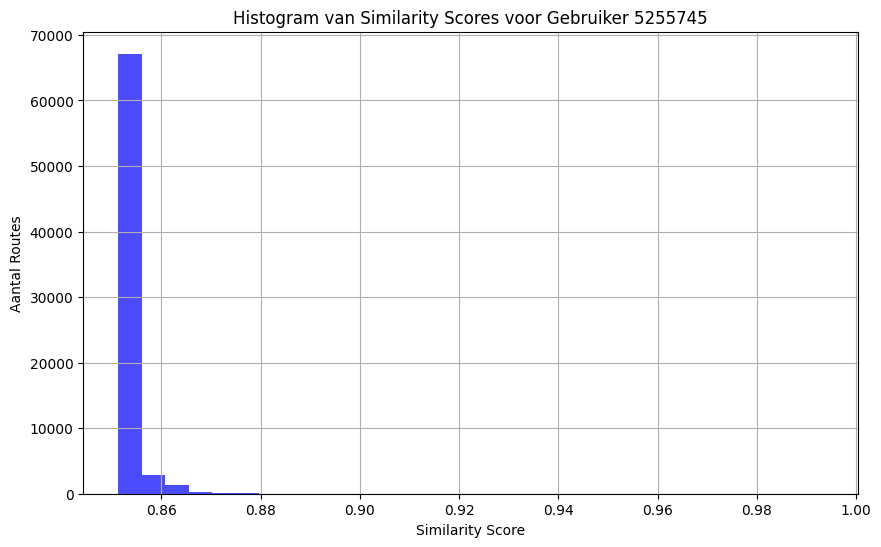

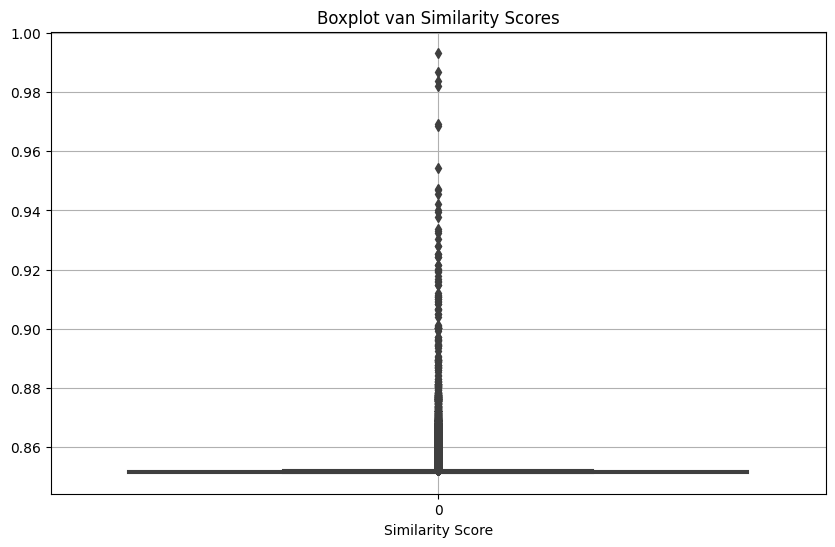

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speeds,distance,altitude_change,...,average_condition_value,mean_altitude,mean_latitude,mean_longitude,orig_altitude_change,orig_distance,orig_mean_altitude,orig_average_condition_value,distance_to_user,similarity_score
6531,"[55.93309784308076, 55.933136735111475, 55.933...","[12.118276488035917, 12.118343124166131, 12.11...","[11.2, 11.2, 11.6, 12.6, 13.0, 14.6, 14.8, 15....",bike,305305970,"[93, 96, 102, 109, 112, 117, 118, 122, 123, 12...","[1394295421, 1394295423, 1394295428, 139429543...","[10.814487816448953, 15.845923573620915, 17.97...",0.151816,0.007667,...,0.626049,0.531276,55.941095,12.173649,29.4,26.510910,15.0176,6.839766,1.022413,0.993313
6519,"[55.93272694386542, 55.932711604982615, 55.932...","[12.117727305740118, 12.117752116173506, 12.11...","[10.6, 10.6, 10.6, 11.0, 11.2, 11.2, 11.4, 11....",bike,330545838,"[87, 87, 91, 92, 97, 100, 102, 108, 109, 113, ...","[1398628745, 1398628746, 1398628749, 139862875...","[8.304480807550311, 0.0, 43.74348994730934, 17...",0.133068,0.007302,...,0.626049,0.531325,55.945864,12.181213,28.0,23.237015,15.9524,6.839766,1.455483,0.986704
6492,"[55.93977981247008, 55.939792888239026, 55.939...","[12.265827739611268, 12.266261167824268, 12.26...","[21.0, 21.0, 21.2, 21.6, 22.2, 22.2, 21.2, 19....",bike,385728538,"[98, 101, 100, 101, 104, 108, 112, 112, 109, 1...","[1407262461, 1407262467, 1407262473, 140726247...","[16.274350664881723, 16.462478072982652, 11.78...",0.211064,0.005059,...,0.626049,0.531161,55.942760,12.167379,19.4,36.857089,12.8524,6.839766,1.385111,0.983804
6502,"[55.93310832045972, 55.933094741776586, 55.933...","[12.117928974330425, 12.117950515821576, 12.11...","[10.2, 10.2, 10.6, 10.6, 11.2, 11.4, 11.8, 12....",bike,366612232,"[106, 106, 108, 108, 112, 114, 118, 121, 124, ...","[1404325808, 1404325809, 1404325811, 140432581...","[7.288010057757023, 14.376076074541675, 12.354...",0.130090,0.007302,...,0.626049,0.531298,55.947141,12.182041,28.0,22.717000,15.4396,6.839766,1.599647,0.981914
6527,"[55.93313648365438, 55.9331597853452, 55.93323...","[12.11831864900887, 12.11836600676179, 12.1185...","[11.2, 11.2, 11.6, 11.8, 12.8, 13.4, 14.2, 14....",bike,311289144,"[99, 99, 102, 104, 110, 114, 117, 118, 121, 12...","[1395337394, 1395337395, 1395337398, 139533740...","[14.169523135915044, 15.188736084353101, 19.78...",0.114735,0.005111,...,0.626049,0.531181,55.941796,12.153452,19.6,20.035734,13.2280,6.839766,1.973038,0.969188


In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
import folium
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns 

# Pad naar de bestanden
user_profiles_path = '../Data/Fietsdata/grotebestanden/bike_gebruikersprofielen2.json'
routes_path = '../Data/Fietsdata/grotebestanden/fietsroutes_aangepast_clean.json'

# Stap 1: Laad de gebruikersprofielen en routes
# with open(user_profiles_path, 'r') as file:
#     user_profiles_content = (json.loads(line) for line in file)
#     user_profiles_df = pd.DataFrame(user_profiles_content)

# with open(routes_path, 'r') as file:
#     routes_content = [json.loads(line) for line in file if line.strip()]

# routes_df = pd.DataFrame(routes_content)

user_profiles_df = pd.read_json(user_profiles_path, lines=True)
routes_df = pd.read_json(routes_path, lines=True)

# print("voor het verwijderen van de NaN-waarden")
# print(user_profiles_df.isna().sum())
# print(routes_df.isna().sum())

# # Verwijder rijen met NaN-waarden in 'userId' en 'average_condition_value'
# routes_df.dropna(subset=['userId', 'average_condition_value'], inplace=True)

# print("na het verwijderen van de NaN-waarden")
# print(user_profiles_df.isna().sum())
# print(routes_df.isna().sum())

# Stap 2: Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
scaler = MinMaxScaler()
user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']] = scaler.fit_transform(user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']])
routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']] = scaler.fit_transform(routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']])

# Stap 3: Bepaal gewichten voor gebruikerskenmerken

gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0}

# Stap 4: Definieer aanbevelingsfunctie voor routes

def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, top_n=10):
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id]
    user_location = (user_data['most_common_lat'].iloc[0], user_data['most_common_lon'].iloc[0])


    # Bereken de afstand tussen de gebruiker en elke route
    def calculate_distance_to_user(row):
        route_location = (row['mean_latitude'], row['mean_longitude'])
        distance_to_user = geodesic(user_location, route_location).kilometers
        return distance_to_user

    routes_df['distance_to_user'] = routes_df.apply(calculate_distance_to_user, axis=1)

    # Functie om de cosine similarity te berekenen
    def calculate_cosine_similarity(row):
        user_values = user_data[['average_altitude_changes', 'average_distances', 'average_condition_value']].values[0]
        route_values = row[['altitude_change', 'distance', 'distance_to_user', 'average_condition_value']]

        # Bereken de gewogen waarden
        gewogen_user_values = np.array([
            user_values[0] * gewichten[user_id]['average_altitude_change'],
            user_values[1] * gewichten[user_id]['average_distance'],
            user_values[2] * gewichten[user_id]['average_condition_value'],
            gewichten[user_id]['distance_to_user']])

        gewogen_route_values = np.array([
            route_values['altitude_change'],
            route_values['distance'],
            route_values['average_condition_value'],
            route_values['distance_to_user']])

        # Cosine similarity berekenen
        return cosine_similarity([gewogen_user_values], [gewogen_route_values])[0][0]


    # Pas de cosine similarity functie toe en sla de score op
    routes_df['similarity_score'] = routes_df.apply(calculate_cosine_similarity, axis=1)
# Selecteer de routes met de hoogste cosine similarity scores
    recommended_routes = routes_df.sort_values(by='similarity_score', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.hist(routes_df['similarity_score'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram van Similarity Scores voor Gebruiker {user_id}')
    plt.xlabel('Similarity Score')
    plt.ylabel('Aantal Routes')
    plt.grid(True)
    plt.show()

    # Aan het einde van je script, na het genereren van het histogram
    plt.figure(figsize=(10, 6))
    sns.boxplot(routes_df['similarity_score'])
    plt.title('Boxplot van Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.grid(True)
    plt.show()
    # Stap 5: Creëer een kaart met de locatie van de gebruiker en de routes
    user_data = user_profiles_df[user_profiles_df['userId'] == sample_user_id].iloc[0]
    user_popup_info = f"UserID: {sample_user_id}<br>" \
                    f"Average Altitude Change: {user_data['orig_average_altitude_changes']}<br>" \
                    f"Average Distance: {user_data['orig_average_distances']}<br>" \
                    f"Average Condition Value: {user_data['orig_average_condition_value']}"


    mapbox_tileset = 'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoicnVwYXR0eW4iLCJhIjoiY2xyaWU2NG9nMDd6dzJtcDhwMHp5NWV3biJ9.bHb-trK3I9Z0H2uWRSoWow'
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles=mapbox_tileset, attr='Mapbox')
    folium.Marker(user_location, popup=user_popup_info).add_to(map_obj)

    # Definieer een lijst met kleuren
    colors = ["red", "blue", "green", "purple", "orange"]

    for index, route in enumerate(recommended_routes.iterrows()):
        _, route_data = route
        route_coords = list(zip(route_data['latitude'], route_data['longitude']))
        route_color = colors[index % len(colors)]
        route_popup_info = f"Route ID: {route_data['id']}<br>" \
                        f"User ID: {route_data['userId']}<br>" \
                        f"Altitude Change: {route_data['orig_altitude_change']}<br>" \
                        f"Distance: {route_data['orig_distance']}<br>" \
                        f"Condition Value: {route_data['orig_average_condition_value']}"
        folium.PolyLine(route_coords, color=route_color, weight=2.5, opacity=1, popup=route_popup_info).add_to(map_obj)

    display(map_obj) 


    return recommended_routes


# Stap 6: Test de functie voor een specifieke gebruiker


# sample_user_id = 10921915
# sample_user_id = 13693003
# sample_user_id = 9225240
# sample_user_id = 7898832
sample_user_id = 5255745
if sample_user_id in gewichten:
    print(f"Gewichten voor gebruiker {sample_user_id}: {gewichten[sample_user_id]}")
else:
    print(f"Geen gewichten gevonden voor gebruiker {sample_user_id}")

recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

recommended_routes.head()
